In [1]:
import pandas as pd
        
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
sample_submission_df = pd.read_csv('datasets/sample_submission.csv')
print(sample_submission_df.shape)
sample_submission_df.head()

(51012, 2)


,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [3]:
test_df = pd.read_csv('datasets/test.csv')
print(test_df.shape)
test_df.head()

(51012, 37)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [4]:
train_df = pd.read_csv('datasets/train.csv')
print(train_df.shape)
train_df.head()

(76518, 38)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [6]:
train_df['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

### Marital status
1. 미혼
2. 기혼
3. 홀아비
4. 이혼
5. 동거
6. 법적 별거
### Daytime/evening attendance
- 1. 낮
- 0. 저녁
### Gender
- 1. male
- 0. female
### Age at enrollment
- 수치형
### Curricular units 1st sem (credited)
- 1학기에 이수한 교과 단위 수
### Curricular units 1st sem (enrolled)
- 1학기에 등록한 교과 단위 수
### Curricular units 2nd sem (credited)
- 2학기에 이수한 교과 단위 수
### Curricular units 2nd sem (enrolled)
- 2학기에 등록한 교과 단위 수

In [7]:
test = test_df.drop(['id'], axis=1)
train = train_df.drop(['id'], axis=1)

test.shape, train.shape

((51012, 36), (76518, 37))

In [8]:
train['Target'] = train['Target'].replace(['Dropout', 'Enrolled', 'Graduate'], [0, 1, 2])
train['Target'].value_counts()

Target
2    36282
0    25296
1    14940
Name: count, dtype: int64

In [9]:
train['Marital status'].value_counts()

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Marital status
1    21726
2     2968
4      509
5       63
6       23
3        7
Name: count, dtype: int64


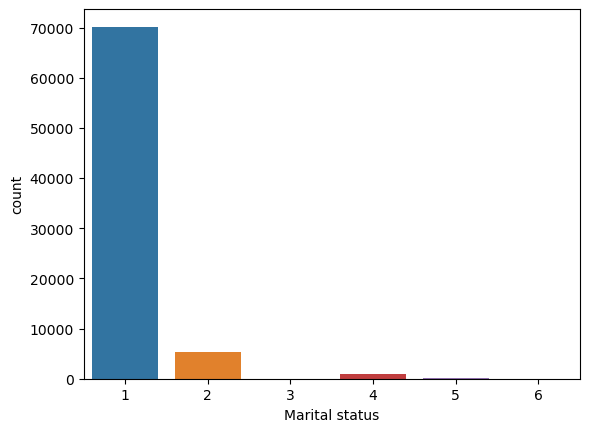

In [11]:
sns.countplot(x=train['Marital status'], data=train[train['Target']==0])
print(train[train['Target']==0]['Marital status'].value_counts())

Marital status
1    14036
2      735
4      147
5       13
6        7
3        2
Name: count, dtype: int64


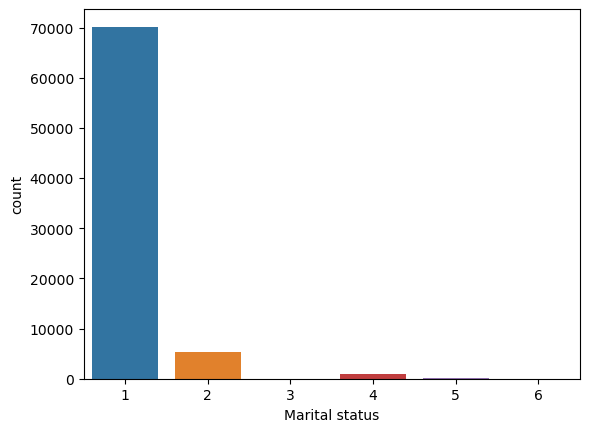

In [12]:
sns.countplot(x=train['Marital status'], data=train[train['Target']==1])
print(train[train['Target']==1]['Marital status'].value_counts())

Marital status
1    34427
2     1593
4      210
5       40
3        7
6        5
Name: count, dtype: int64


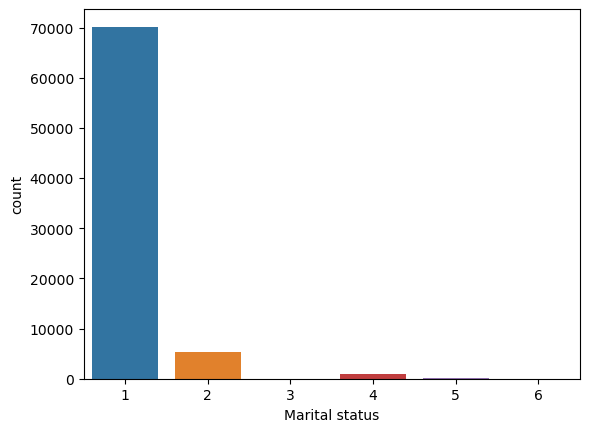

In [13]:
sns.countplot(x=train['Marital status'], data=train[train['Target']==2])
print(train[train['Target']==2]['Marital status'].value_counts())

<Axes: xlabel='Marital status', ylabel='count'>

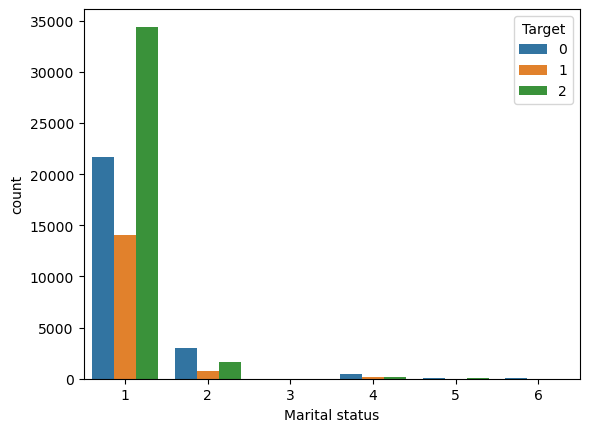

In [14]:
sns.countplot(x=train['Marital status'], hue=train['Target'])

### 중퇴, 등록, 졸업 모두 미혼 상태인 데이터가 많음
### 중퇴는 기혼 상태일 때 많이 일어난다고 확인됨.

<Axes: xlabel='Daytime/evening attendance', ylabel='count'>

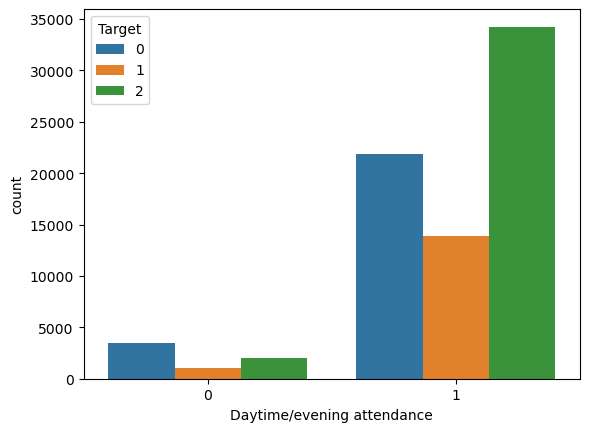

In [15]:
sns.countplot(x=train['Daytime/evening attendance'],hue=train['Target'])

### 낮에 수업에 참여한 학생들이 저녁에 수업에 참여한 학생들보다 약 11배 많음
### 저녁에 수업에 참여한 학생들의 중퇴비율이 60%가 넘음

<Axes: xlabel='Gender', ylabel='count'>

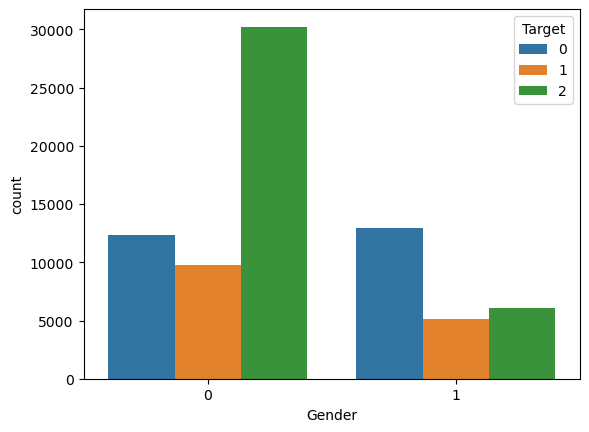

In [16]:
sns.countplot(x=train['Gender'],hue=train['Target'])

### 성별에 따른 중퇴, 등록, 졸업 비율은 크게 차이가 없는 것으로 확인됨.

In [17]:
train[['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)']].describe()

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled)
count,76518.000000,76518.000000
mean,0.188871,5.891516
std,1.175296,1.671776
min,0.000000,0.000000
25%,0.000000,5.000000
50%,0.000000,6.000000
75%,0.000000,6.000000
max,20.000000,26.000000


<Axes: xlabel='Curricular units 1st sem (credited)', ylabel='Count'>

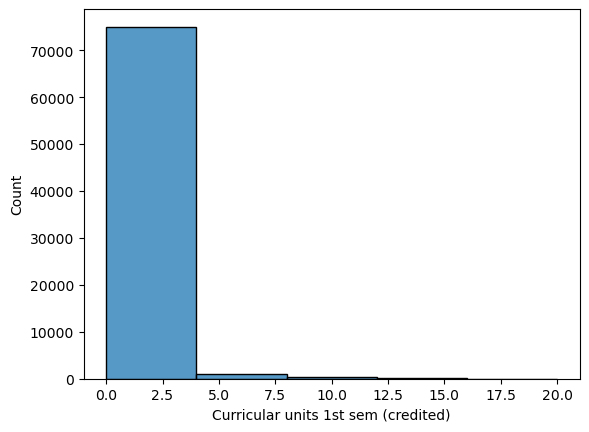

In [18]:
sns.histplot(train['Curricular units 1st sem (credited)'], bins=5)

<Axes: xlabel='Curricular units 1st sem (enrolled)', ylabel='Count'>

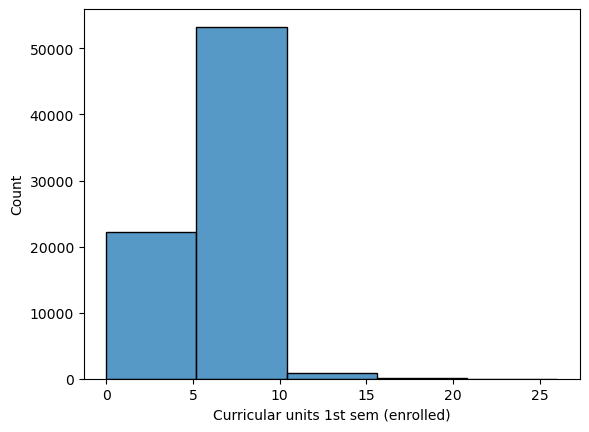

In [19]:
sns.histplot(train['Curricular units 1st sem (enrolled)'], bins=5)

<Axes: xlabel='Curricular units 2nd sem (credited)', ylabel='Count'>

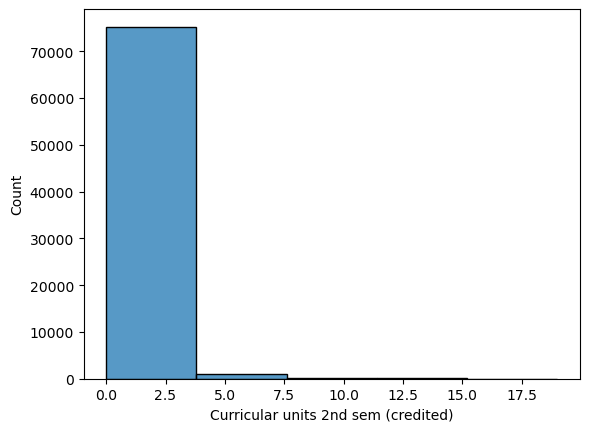

In [20]:
sns.histplot(train['Curricular units 2nd sem (credited)'], bins=5)

<Axes: xlabel='Curricular units 2nd sem (enrolled)', ylabel='Count'>

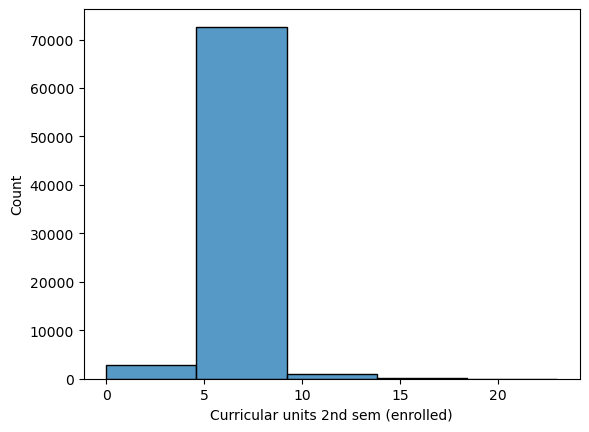

In [21]:
sns.histplot(train['Curricular units 2nd sem (enrolled)'], bins=5)

### 등록한 이수 단위와 수료한 이수 단위의 차이를 수치형으로 변환해서 정규분포형으로 바꿔서 확인 해보면 좋은 특성 나올 것으로 보임

<Axes: xlabel='Curricular units 1st', ylabel='Count'>

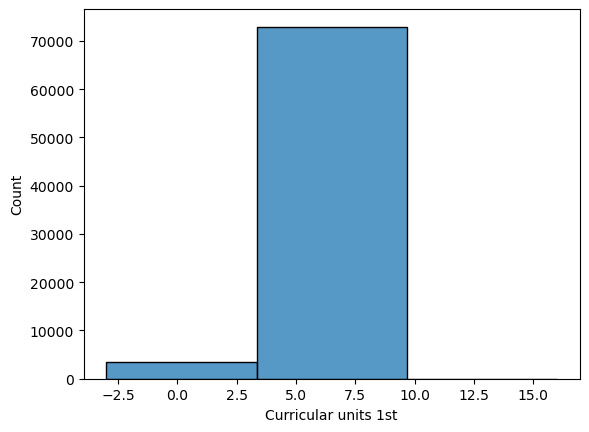

In [22]:
train['Curricular units 1st'] = train['Curricular units 1st sem (enrolled)'] - train['Curricular units 1st sem (credited)']

sns.histplot(train['Curricular units 1st'], bins=3)

In [23]:
train[train['Curricular units 1st'] < 0]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Curricular units 1st
5046,1,43,1,9853,1,1,140.0,1,37,37,...,19,19,19,12.105263,0,12.4,0.5,1.79,2,-1
50201,1,42,1,9500,1,1,149.0,1,3,3,...,8,11,12,13.496667,0,12.7,3.7,-1.70,2,-3
54312,1,43,1,9254,1,1,130.0,1,38,37,...,10,15,6,11.181818,0,7.6,2.6,0.32,2,-1
60743,2,43,1,8014,0,1,133.1,1,34,34,...,7,7,6,13.500000,0,7.6,2.6,0.32,0,-1
69915,1,39,1,9003,1,1,150.0,1,38,38,...,12,15,6,12.555556,0,9.4,-0.8,-3.12,2,-1
75828,1,7,1,9254,1,3,120.0,1,37,37,...,11,16,9,11.833333,0,12.7,3.7,-1.70,0,-2


### 음수 띄고 있는 칼럼 이상치로 판단하고 제거할 예정

In [24]:
idx = train[train['Curricular units 1st'] < 0].index
train.drop(idx, inplace=True)
train.shape

(76512, 38)

<Axes: xlabel='Curricular units 1st', ylabel='Count'>

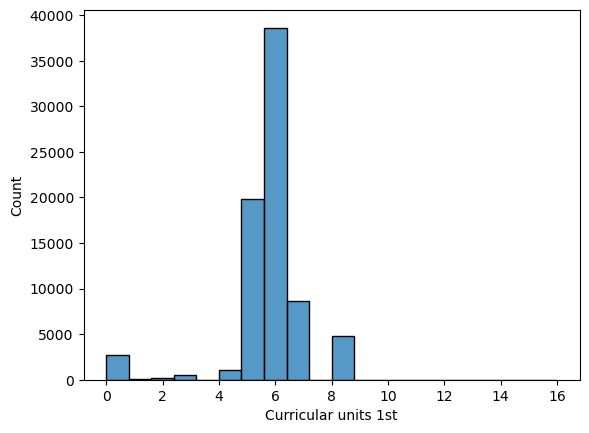

In [25]:
sns.histplot(train['Curricular units 1st'], bins=20)

<Axes: xlabel='Age at enrollment', ylabel='Count'>

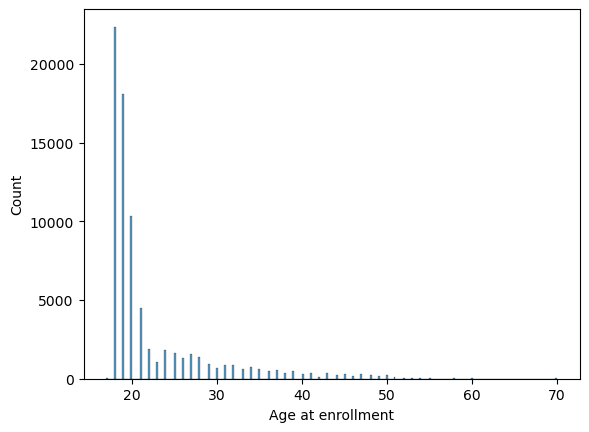

In [26]:
sns.histplot(train['Age at enrollment'])

In [27]:
train['Age at enrollment'].describe()

count    76512.000000
mean        22.278113
std          6.888918
min         17.000000
25%         18.000000
50%         19.000000
75%         23.000000
max         70.000000
Name: Age at enrollment, dtype: float64

In [28]:
train['Target'] = train['Target'].replace([0,1,2], [1, 0, 0])
train['Target'].value_counts()

Target
0    51218
1    25294
Name: count, dtype: int64

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [30]:
class Encoder(torch.utils.data.Dataset):
    def __init__(self, dataframe, seed=1):
        pos = dataframe[dataframe['Target']==0]
        neg = dataframe[dataframe['Target']==1].sample(
            len(pos), random_state=seed, replace=True)
        df = pd.concat([pos, neg])
        
        catCols = ['Marital status', 'Daytime/evening attendance', 'Gender']
        catVecs = pd.get_dummies(df[catCols]).values
        
        contCols = ['Age at enrollment', 'Curricular units 1st']
        contVecs = df[contCols].values
        
        self.targets = np.hstack([catVecs, contVecs])
        self.labels = df['Target'].values
        
    def __getitem__(self, i):
        return self.targets[i, :], self.labels[i]
    
    def __len__(self):
        return len(self.targets)

In [31]:
dataset = Encoder(train)
dataset

In [32]:
train_size = int(0.65 * len(dataset))
validation_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - validation_size
train_set, validation_set, test_set = torch.utils.data.random_split(
    dataset, [train_size, validation_size, test_size])

In [52]:
np.random.seed(1)
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=3200, shuffle=True)
validation_loader = torch.utils.data.DataLoader(
    validation_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=32, shuffle=True)
data_loaders = {"train": train_loader, "validation": validation_loader}

In [53]:
class SingleNeuralNetClassifier(nn.Module):
    def __init__(self, vec_size):
        super(SingleNeuralNetClassifier, self).__init__()
        self.fc = nn.Linear(vec_size, 1)
    
    def forward(self, inputs):
        return self.fc(inputs.squeeze(1).float())

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [55]:
import tqdm

In [56]:
def train_model(model, data_loaders, n_epochs=100):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                        lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')
    all_losses = {'train': [], 'validation': []}
    for epoch in range(n_epochs):
        losses = {'train': [], 'validation': []}
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train(True)
            else:
                model.train(False)
            
            progress_bar = tqdm.tqdm(data_loaders[phase], leave=False)
            total = 0
            for inputs, target in progress_bar:
                model.zero_grad()

                output = model(inputs)
                loss = criterion(output.squeeze(), target.float())
                    
                nn.utils.clip_grad_norm_(model.parameters(), 3)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                
                progress_bar.set_description(f'Loss: {loss.item():.3f}')
                
                losses[phase].append(loss.item())
                total += 1
        
            epoch_loss = sum(losses[phase]) / total
            all_losses[phase].append(epoch_loss)
        scheduler.step(all_losses['validation'][-1])
                    
        mess = ("Epoch #{0}\tTrain Loss: {1:.3f}\t"
                "Validation Loss: {2:.3f}").format(
                    epoch + 1, all_losses['train'][-1],
                    all_losses['validation'][-1])
        tqdm.tqdm.write(mess)


In [ ]:
snnc_model = SingleNeuralNetClassifier(5)
train_model(snnc_model, data_loaders, n_epochs=100)

Epoch #1	Train Loss: 0.730	Validation Loss: 0.597


Epoch #2	Train Loss: 0.586	Validation Loss: 0.590


Epoch #3	Train Loss: 0.583	Validation Loss: 0.590


Epoch #4	Train Loss: 0.583	Validation Loss: 0.588


Epoch #5	Train Loss: 0.582	Validation Loss: 0.589


Epoch #6	Train Loss: 0.582	Validation Loss: 0.589


Epoch #7	Train Loss: 0.582	Validation Loss: 0.588


Epoch #8	Train Loss: 0.581	Validation Loss: 0.588


Epoch #9	Train Loss: 0.581	Validation Loss: 0.587


Epoch #10	Train Loss: 0.581	Validation Loss: 0.587


Epoch #11	Train Loss: 0.581	Validation Loss: 0.586


Epoch #12	Train Loss: 0.581	Validation Loss: 0.588


Epoch #13	Train Loss: 0.581	Validation Loss: 0.587


Epoch #14	Train Loss: 0.581	Validation Loss: 0.586


Epoch #15	Train Loss: 0.580	Validation Loss: 0.586


Epoch #16	Train Loss: 0.580	Validation Loss: 0.586


Epoch #17	Train Loss: 0.580	Validation Loss: 0.588


Epoch #18	Train Loss: 0.580	Validation Loss: 0.587


Epoch #19	Train Loss: 0.580	Validation Loss: 0.585


Epoch #20	Train Loss: 0.580	Validation Loss: 0.585


Epoch #21	Train Loss: 0.580	Validation Loss: 0.586


Epoch #22	Train Loss: 0.580	Validation Loss: 0.585


Epoch #23	Train Loss: 0.580	Validation Loss: 0.586


Epoch #24	Train Loss: 0.580	Validation Loss: 0.587


Epoch #25	Train Loss: 0.580	Validation Loss: 0.585


Epoch #26	Train Loss: 0.580	Validation Loss: 0.586


Epoch #27	Train Loss: 0.580	Validation Loss: 0.585


Epoch #28	Train Loss: 0.580	Validation Loss: 0.587


Epoch #29	Train Loss: 0.580	Validation Loss: 0.586


Epoch #30	Train Loss: 0.580	Validation Loss: 0.587


Epoch #31	Train Loss: 0.580	Validation Loss: 0.586


Epoch #32	Train Loss: 0.580	Validation Loss: 0.586


Epoch #33	Train Loss: 0.580	Validation Loss: 0.585


Epoch #34	Train Loss: 0.579	Validation Loss: 0.585


Epoch #35	Train Loss: 0.579	Validation Loss: 0.585


Epoch #36	Train Loss: 0.579	Validation Loss: 0.585


Epoch #37	Train Loss: 0.579	Validation Loss: 0.585


Epoch #38	Train Loss: 0.579	Validation Loss: 0.585


Epoch #39	Train Loss: 0.579	Validation Loss: 0.586


Epoch #40	Train Loss: 0.579	Validation Loss: 0.585


Epoch #41	Train Loss: 0.579	Validation Loss: 0.586


Epoch #42	Train Loss: 0.579	Validation Loss: 0.585


Epoch #43	Train Loss: 0.579	Validation Loss: 0.586


Epoch #44	Train Loss: 0.579	Validation Loss: 0.586


Epoch #45	Train Loss: 0.579	Validation Loss: 0.584


Epoch #46	Train Loss: 0.579	Validation Loss: 0.586


Epoch #47	Train Loss: 0.579	Validation Loss: 0.585


Epoch #48	Train Loss: 0.579	Validation Loss: 0.585


Epoch #49	Train Loss: 0.579	Validation Loss: 0.585


Epoch #50	Train Loss: 0.579	Validation Loss: 0.585


Epoch #51	Train Loss: 0.579	Validation Loss: 0.585


Epoch #52	Train Loss: 0.579	Validation Loss: 0.585


Epoch #53	Train Loss: 0.579	Validation Loss: 0.585


Epoch #54	Train Loss: 0.579	Validation Loss: 0.585


Epoch #55	Train Loss: 0.579	Validation Loss: 0.585


Epoch #56	Train Loss: 0.579	Validation Loss: 0.585


Epoch #57	Train Loss: 0.579	Validation Loss: 0.585


Epoch #58	Train Loss: 0.579	Validation Loss: 0.585


Epoch #59	Train Loss: 0.579	Validation Loss: 0.585


Loss: 0.427:  97%|█████████████████████████████████████████████████████████████▊  | 2010/2081 [00:06<00:00, 330.97it/s]

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [47]:
def results(model, test_loader):
    y_res = []
    y_true = []
    for inputs, targets in test_loader:
        y_res.extend(list(model(inputs).flatten()))
        y_true.extend(list(targets.flatten()))
    y_translated = [1 if t > 0.5 else 0 for t in y_res]
    return y_true, y_translated

In [48]:
def evaluation_stats(y_true, y_pred):
    print("Accuracy Score {0:.3f}".format(accuracy_score(y_true, y_pred)))
    print("Precision Score {0:.3f}".format(precision_score(y_true, y_pred)))
    print("Recall Score {0:.3f}\n".format(recall_score(y_true, y_pred)))

In [49]:
print("Single:")
evaluation_stats(*results(snnc_model, test_loader))

Single:
Accuracy Score 0.686
Precision Score 0.809
Recall Score 0.489



<Axes: >

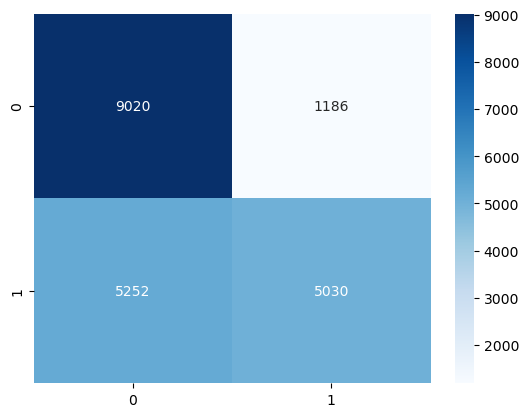

In [50]:
sns.heatmap(confusion_matrix(*results(snnc_model, test_loader)), annot=True, fmt='d', cmap='Blues')

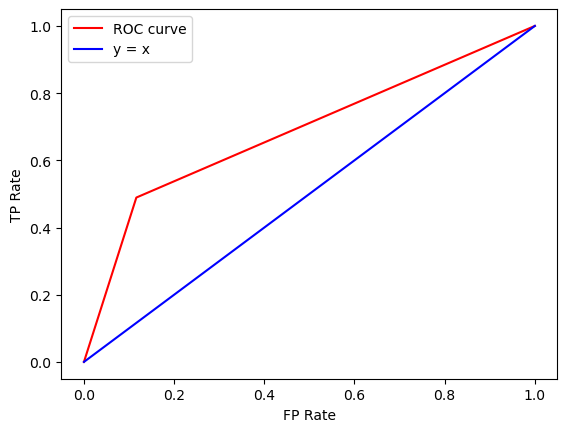

0.6864991408458235

In [51]:
fpr, tpr, tresholds = roc_curve(*results(snnc_model, test_loader))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.legend()

plt.show()

roc_auc_score(*results(snnc_model, test_loader))